# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep="\t")
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [4]:
chipo['item_price'] =  chipo['item_price'].apply(lambda x: float(str(x).replace('$', '')) )

In [56]:
top = chipo.groupby(['item_name'])['quantity'].value_counts()\
                                                .rename('item_qtd')\
                                                .reset_index()\
                                                .sort_values('item_qtd', ascending=False)

In [57]:
chipo_5 = top.loc[top.index[0:5]]

In [58]:
chipo_5

,item_name,quantity,item_qtd
35,Chicken Bowl,1,693
38,Chicken Burrito,1,521
56,Chips and Guacamole,1,455
84,Steak Burrito,1,352
21,Canned Soft Drink,1,264


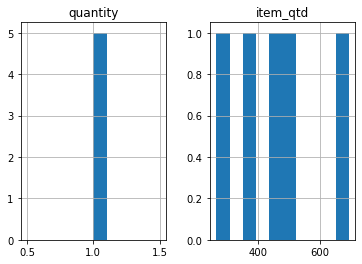

In [59]:
chipo_5.hist(bins=10);

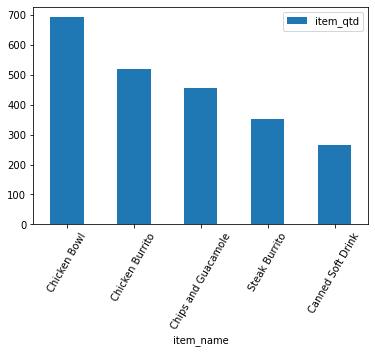

In [61]:
chipo_5.plot.bar(x='item_name', y='item_qtd', rot=60);

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [62]:
items = chipo.sort_values('item_price', ascending=False)

In [63]:
items

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
...,...,...,...,...,...
3936,1578,1,Canned Soda,[Diet Dr. Pepper],1.09
2922,1162,1,Bottled Water,NaN,1.09
1396,567,1,Canned Soda,[Coca Cola],1.09
2562,1014,1,Canned Soda,[Coca Cola],1.09


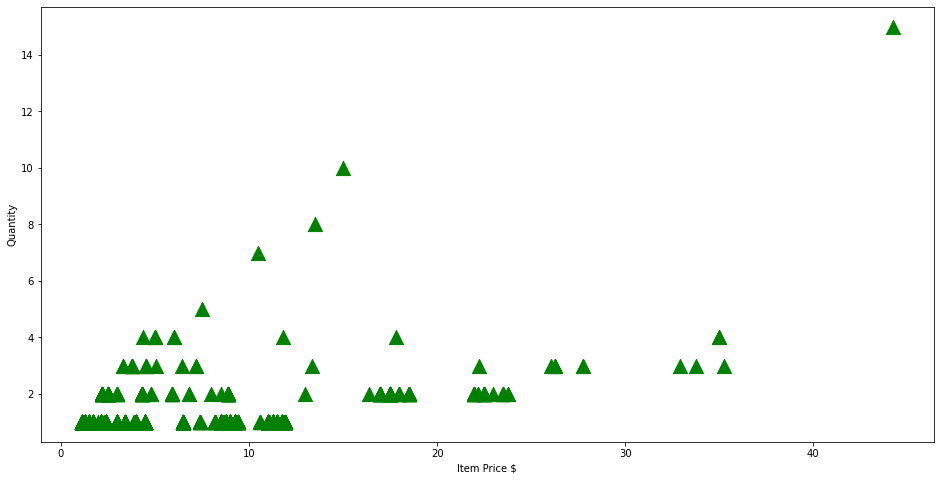

In [91]:
items.plot.scatter(x='item_price', y='quantity', s=200, marker='^', color='green', figsize=(16, 8));
plt.xlabel('Item Price $');
plt.ylabel('Quantity');

plt.show();

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [110]:
# Qual o pedido com mais quantidade compradas

In [102]:
pedidos = chipo.groupby('order_id')['quantity'].sum().rename('qtd.').reset_index().sort_values('qtd.', ascending=False)
top_10 = pedidos.loc[pedidos.index[0:10]]

In [108]:
top_10

,order_id,qtd.
1442,1443,35
925,926,23
1785,1786,20
1659,1660,19
758,759,18
510,511,17
1558,1559,16
1482,1483,14
204,205,12
576,577,11


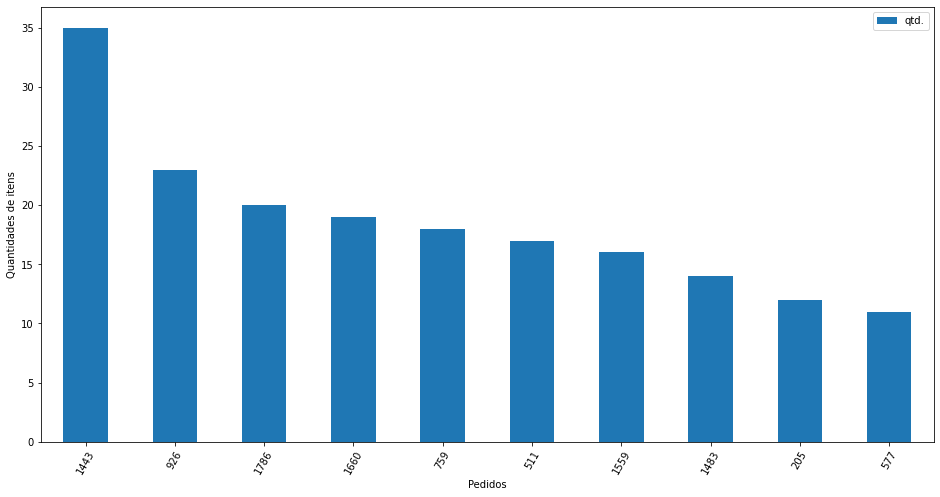

In [109]:
top_10.plot.bar(x='order_id', y='qtd.', rot=60, figsize=(16,8));
plt.xlabel('Pedidos');
plt.ylabel('Quantidades de itens');